Xtrain =  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
y_train =  [5 0 4 ... 5 6 8]
X_test [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ...

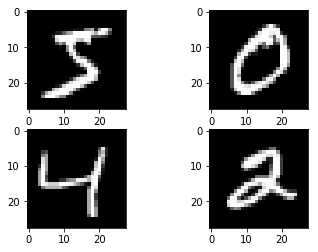

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Found array with dim 3. Estimator expected <= 2.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train_all, y_train_all), (X_test_all, y_test_all) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train_all[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train_all[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train_all[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train_all[5], cmap=plt.get_cmap('gray'))
print('Xtrain = ',X_train_all)
print('y_train = ', y_train_all)
print('X_test', X_test_all)
print('y_test', y_test_all)
# show the plot
plt.show()

cls =[[0],[1]]

def extract_data(X, y, classes):
    """
    X: numpy array, matrix of size (N, d), d is data dim
    y: numpy array, size (N, )
    cls: two lists of labels. For example: 
        cls = [[1, 4, 7], [5, 6, 8]]
    return:
        X: extracted data
        y: extracted label 
            (0 and 1, corresponding to two lists in cls)
    """
    y_res_id = np.array([])
    for i in cls[0]:
        y_res_id = np.hstack((y_res_id,np.where(y==i)[0]))
    n0 = len( y_res_id)
    for i in cls[1]:
        y_res_id = np.hstack((y_res_id, np.where(y==i)[0]))
    n1 = len(y_res_id) -n0
    y_res_id = y_res_id.astype(int)
    X_res = X[y_res_id,:]/255.0
    y_res = np.asarray([0]*n0 + [1]*n1)
    return (X_res, y_res)

# extract data for training 
(X_train, y_train) = extract_data(X_train_all, y_train_all, cls)

# extract data for test 
(X_test, y_test) = extract_data(X_test_all, y_test_all, cls)

# train the logistic regression model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)